In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# data_dir = "/content/drive/My Drive/Deep_Learning_Project/Data"


In [ ]:
# import pandas as pd

# train_data = pd.read_csv(data_dir + "/emnist-letters-train.csv")
# test_data  = pd.read_csv(data_dir + "/emnist-letters-test.csv")

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crawford/emnist")

print("Path to dataset files:", path)

100%|██████████| 1.24G/1.24G [00:08<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/crawford/emnist/versions/3


In [6]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/crawford/emnist/versions/3"
os.listdir(dataset_path)

['emnist_source_files',
 'emnist-bymerge-test.csv',
 'emnist-digits-train.csv',
 'emnist-bymerge-train.csv',
 'emnist-letters-test.csv',
 'emnist-digits-mapping.txt',
 'emnist-digits-test.csv',
 'emnist-mnist-train.csv',
 'emnist-bymerge-mapping.txt',
 'emnist-byclass-train.csv',
 'emnist-mnist-mapping.txt',
 'emnist-balanced-test.csv',
 'emnist-letters-mapping.txt',
 'emnist-mnist-test.csv',
 'emnist-byclass-mapping.txt',
 'emnist-letters-train.csv',
 'emnist-balanced-mapping.txt',
 'emnist-balanced-train.csv',
 'emnist-byclass-test.csv']

In [7]:
import os
import pandas as pd

dataset_path = "/root/.cache/kagglehub/datasets/crawford/emnist/versions/3"

train_path = os.path.join(dataset_path, "emnist-letters-train.csv")
test_path  = os.path.join(dataset_path, "emnist-letters-test.csv")

In [81]:
train_data = pd.read_csv(train_path, header=None)
test_data = pd.read_csv(test_path, header=None)

print(train_data.shape)
print(test_data.shape)

(88800, 785)
(14800, 785)


In [3]:
import os

for root, dirs, files in os.walk('/kaggle/input'):
    for f in files:
        print(os.path.join(root, f))


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_data = pd.read_csv(r"/kaggle/input/emnist-letters/emnist-letters-test.csv", header=None)
train_data = pd.read_csv(r"/kaggle/input/emnist-letters/emnist-letters-train.csv", header=None)

In [82]:
column_names = ['label'] + [f'pixel_{i}' for i in range(784)]
train_data.columns = column_names
test_data.columns=column_names

In [13]:
train_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#unique values in label columns
number_of_labels = train_data['label'].nunique()

In [84]:
train_data.shape

(88800, 785)

In [85]:
test_data.shape

(14800, 785)

In [86]:
test_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize class balance

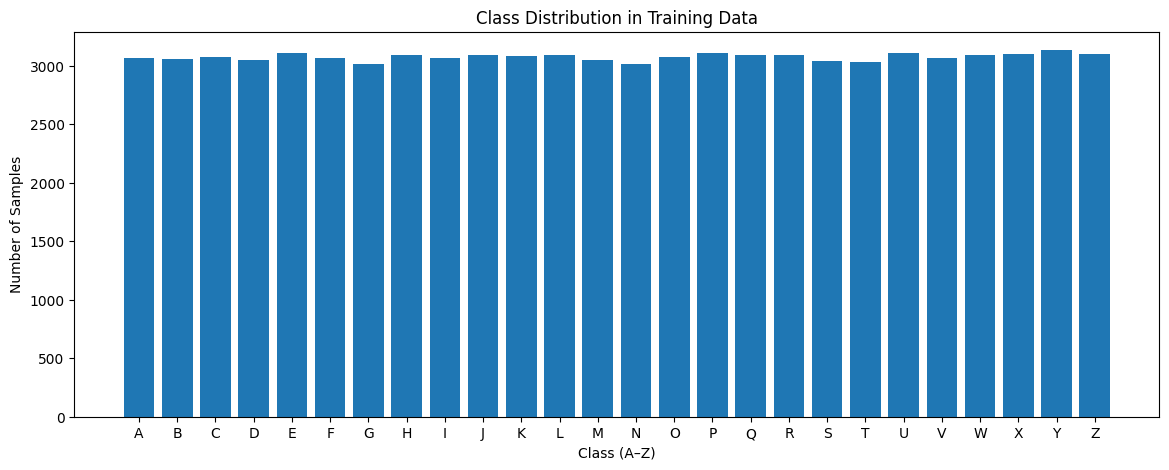

In [87]:
class_counts = pd.Series(y_int).value_counts().sort_index()
class_counts.index = [chr(i + 65) for i in class_counts.index]
plt.figure(figsize=(14, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class (A–Z)")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Data")
plt.xticks(rotation=0)
plt.show()


In [88]:
def show_samples(X, y, classes=26, n=8):
    plt.figure(figsize=(12,3))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(X[i].squeeze(), cmap='gray')
        lbl = np.argmax(y[i]) if y is not None else None
        if lbl is not None:
            plt.title(chr(ord('A') + lbl))
        plt.axis('off')
    plt.show()

In [89]:
# Separate features and labels of training
X_train = train_data.drop('label', axis=1).values
y_train_raw = train_data['label'].values


print("Features shape:", X_train.shape)
print("Labels shape:", y_train_raw.shape)


Features shape: (88800, 784)
Labels shape: (88800,)


In [90]:
# Separate features and labels of testing
X_test = test_data.drop('label', axis=1).values
y_test_raw = test_data['label'].values

print("Features shape:", X_test.shape)
print("Labels shape:", y_test_raw.shape)

Features shape: (14800, 784)
Labels shape: (14800,)


In [91]:

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)


x_train shape:  (88800, 28, 28, 1)
x_test shape:  (14800, 28, 28, 1)


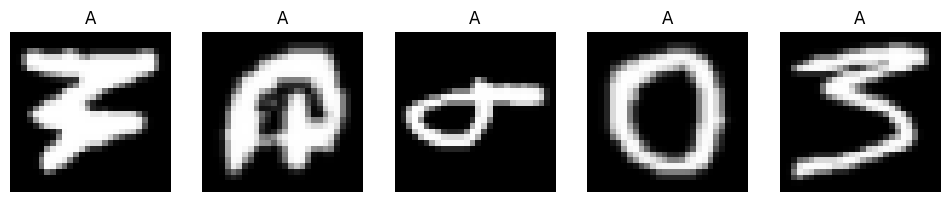

In [92]:
show_samples(X_train, y_train_raw, n=5)

In [93]:
X_train = np.rot90(X_train, k=1, axes=(1,2))
X_test  = np.rot90(X_test,  k=1, axes=(1,2))

# Visualizing some samples after rotation

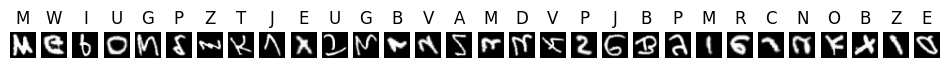

In [94]:
show_samples(X_train, y_train, n=30)

In [95]:
# Normlization
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# One Hot Encoding

In [96]:
y_train = to_categorical(y_train_raw - 1, num_classes=26)
y_test  = to_categorical(y_test_raw - 1, num_classes=26)

# Shuffling the training dataset

In [97]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Train & validation split

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (79920, 28, 28, 1) (79920, 26)
Validation set: (8880, 28, 28, 1) (8880, 26)


In [ ]:
show_samples(X_train, y_train, n=30)

# Initialize the model

In [99]:
model_vgg = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# VGG 19

In [ ]:
# # import tensorflow as tf
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# def build_vgg19_from_scratch(input_shape=(32, 32, 3), num_classes=26):
#     model_vgg = Sequential()

#     # Block 1
#     model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
#     model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 2
#     model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 3
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 4
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 5
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Fully Connected Layers
#     model_vgg.add(Flatten())
#     model_vgg.add(Dense(4096, activation='relu'))
#     model_vgg.add(Dropout(0.5))
#     model_vgg.add(Dense(4096, activation='relu'))
#     model_vgg.add(Dropout(0.5))
#     model_vgg.add(Dense(num_classes, activation='softmax')) # For classification

#     return model_vgg

# model_vgg = build_vgg19_from_scratch()


# Compile the model

In [100]:
model_vgg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [101]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=6,
        restore_best_weights=True
    )
]


In [102]:
history = model_vgg.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7733 - loss: 0.7707 - val_accuracy: 0.9243 - val_loss: 0.2189
Epoch 2/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9237 - loss: 0.2355 - val_accuracy: 0.9314 - val_loss: 0.1894
Epoch 3/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9337 - loss: 0.1923 - val_accuracy: 0.9315 - val_loss: 0.1750
Epoch 4/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9402 - loss: 0.1692 - val_accuracy: 0.9369 - val_loss: 0.1850
Epoch 5/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9451 - loss: 0.1541 - val_accuracy: 0.9410 - val_loss: 0.1681
Epoch 6/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9494 - loss: 0.1437 - val_accuracy: 0.9437 - val_loss: 0.1644
Epoch 7/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9521 - loss: 0.1267 - val_accuracy: 0.9437 - val_loss: 0.1616
Epoch 8/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9562 - loss: 0

In [103]:
# save final model
model_vgg.save('final_emnist_vgg.h5')

# Training & Validation Loss & Accuracy

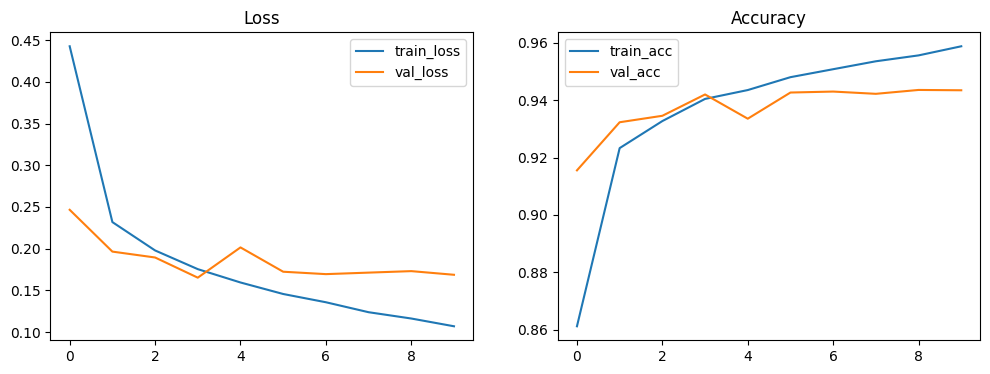

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# Final Evaluation on Validation/Test Set

In [39]:
val_loss, val_acc = model_vgg.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


Validation Loss: 0.1652
Validation Accuracy: 0.9420


# Classification Report

In [42]:
import string
from sklearn.metrics import classification_report
labels = list(string.ascii_uppercase)

print(
    classification_report(
        y_true,
        y_pred_classes,
        target_names=labels
    )
)


              precision    recall  f1-score   support

           A       0.98      0.95      0.97       336
           B       0.97      0.98      0.97       344
           C       0.97      0.97      0.97       347
           D       0.99      0.97      0.98       351
           E       0.96      0.96      0.96       333
           F       0.98      0.97      0.97       330
           G       0.94      0.80      0.86       372
           H       0.96      0.96      0.96       332
           I       0.72      0.83      0.77       363
           J       0.93      0.95      0.94       315
           K       0.98      0.97      0.98       356
           L       0.75      0.65      0.69       322
           M       0.99      0.99      0.99       353
           N       0.96      0.98      0.97       353
           O       0.98      0.99      0.98       338
           P       0.99      0.98      0.99       319
           Q       0.82      0.95      0.88       347
           R       0.97    

# ROC Curve

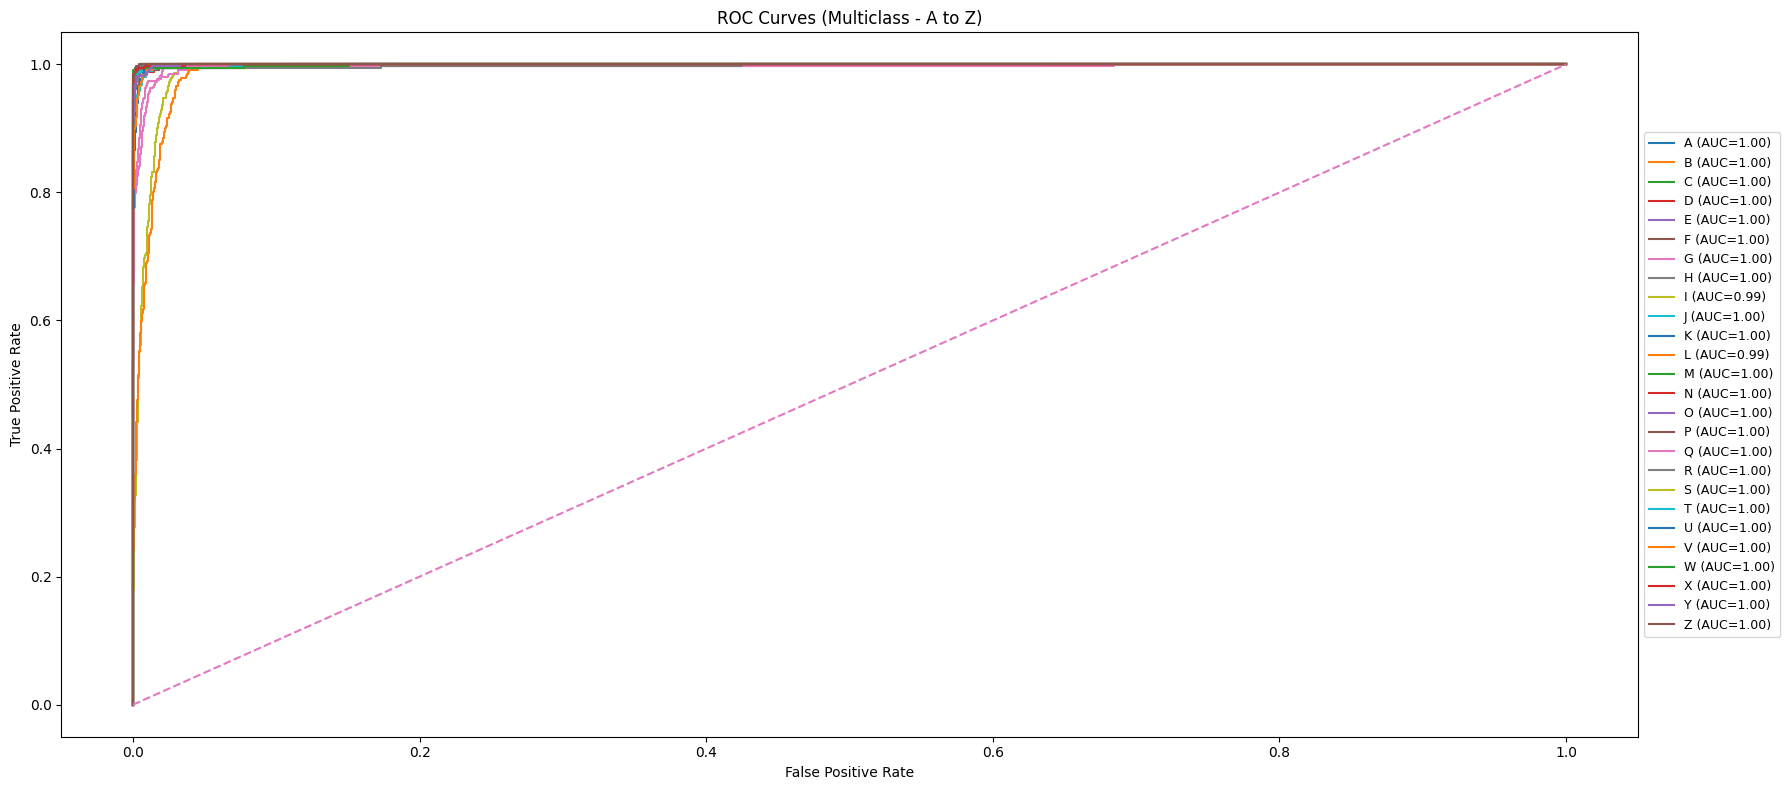

In [44]:
plt.figure(figsize=(18, 8))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'{chr(i + 65)} (AUC={roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Multiclass - A to Z)')
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)
plt.tight_layout()
plt.show()


# Sample Predictions Visualization

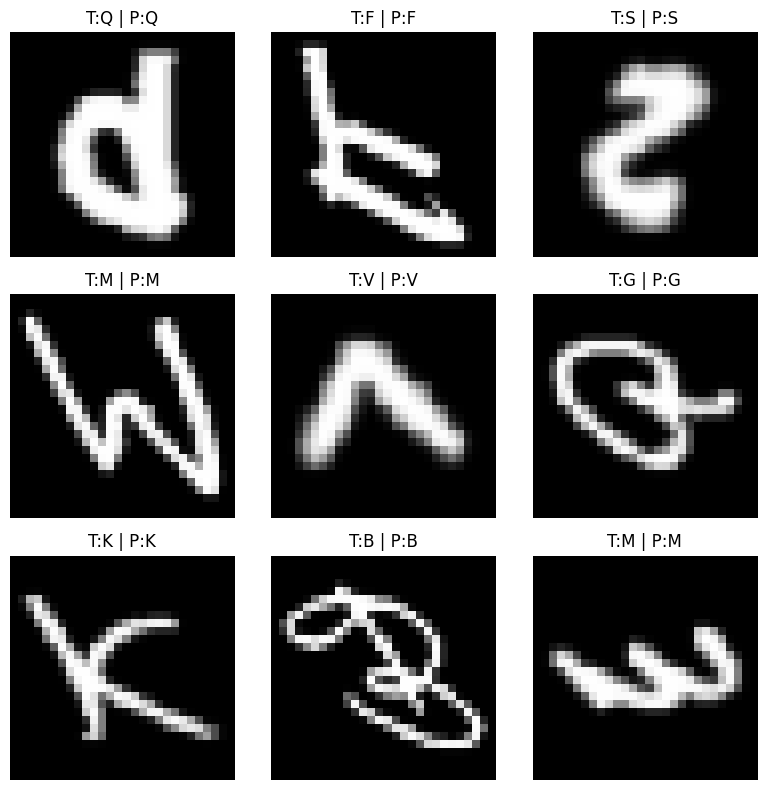

In [45]:
import random

indices = random.sample(range(len(X_val)), 9)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_val[idx].reshape(28,28), cmap='gray')
    true_label = chr(y_true[idx] + 65)
    pred_label = chr(y_pred_classes[idx] + 65)
    plt.title(f"T:{true_label} | P:{pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Overfitting Diagnosis

In [46]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print("Overfitting gap:", final_train_acc - final_val_acc)  #Excellent generalization


Overfitting gap: 0.015340328216552734


# Confusion Matrix

463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


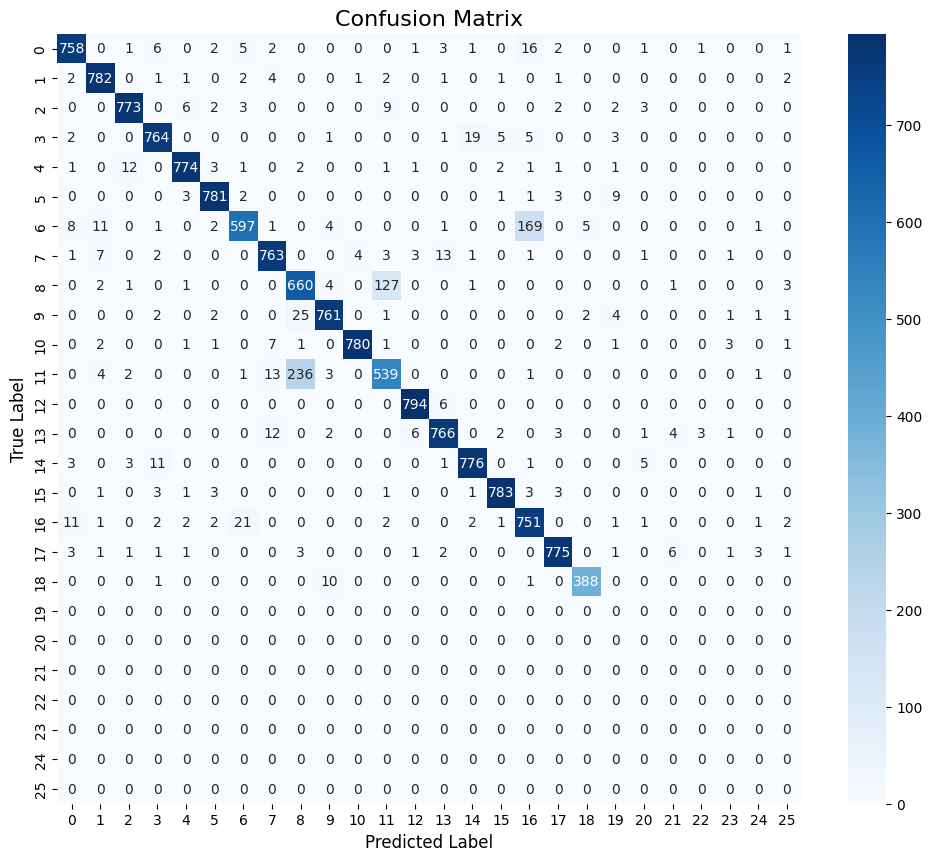

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred_proba = model_vgg.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 10})
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Show some misclassified examples

Number of misclassified: 987


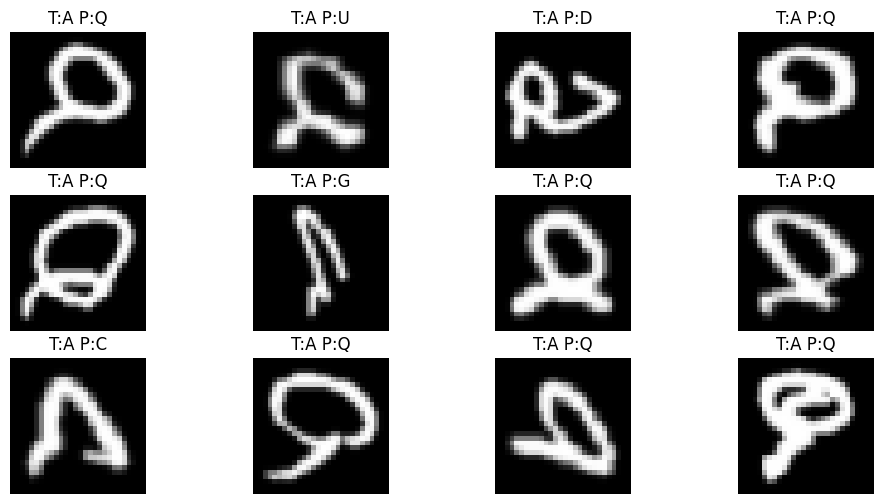

In [ ]:
mis_idx = np.where(y_pred != y_true)[0]
print('Number of misclassified:', len(mis_idx))


n_show = min(12, len(mis_idx))
plt.figure(figsize=(12,6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(X_test[idx].reshape(28, 28).T, cmap='gray')
    # plt.imshow(X_test[idx].squeeze(), cmap='gray')
    plt.title(f'T:{chr(ord("A")+y_true[idx])} P:{chr(ord("A")+y_pred[idx])}')
    plt.axis('off')
plt.show()

# After optimizing some misclassified examples

Total misclassified: 987


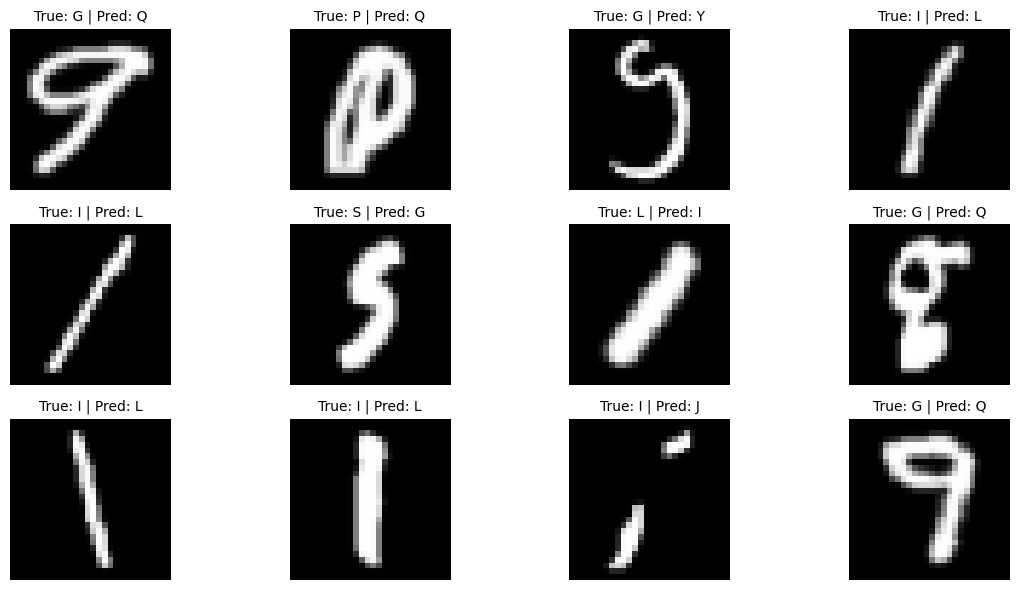

In [ ]:
mis_idx = np.where(y_pred != y_true)[0]
np.random.shuffle(mis_idx)

print(f'Total misclassified: {len(mis_idx)}')
n_show = min(12, len(mis_idx))
plt.figure(figsize=(12, 6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i + 1)
    img = X_test[idx].reshape(28, 28)
    img = np.rot90(img.T, k=1)
    plt.imshow(img, cmap='gray')

    true_char = chr(ord("A") + y_true[idx])
    pred_char = chr(ord("A") + y_pred[idx])

    plt.title(f'True: {true_char} | Pred: {pred_char}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# This indicates that about 5% of EMNIST letters dataset looks like the messy examples above.